# Testing Bomanz high-speed ADC

## Testing at 10MHz

Doing the tests with the [signal emulator](https://github.com/kelu124/echomods/tree/master/silent)

In [16]:
File = ["10MHz/10MHz_adc.csv","10MHz/grounded_right.csv","10MHz/grounded_left.csv"]
import matplotlib.pyplot as plt
import numpy as np
from ADC08200 import CreateSeries

## Testing the GND noise for both extremes of Vref 

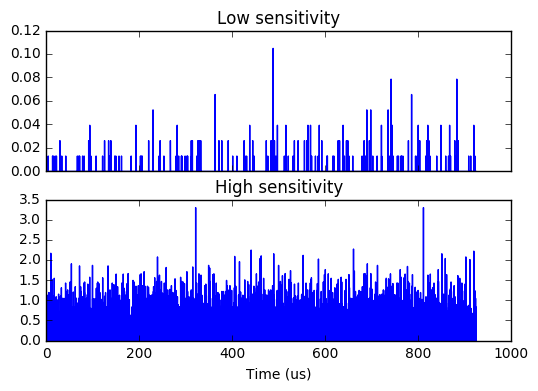

In [64]:
Res1, t1, N1 = CreateSeries(File[1],1000.0)
Res2, t2, N2 = CreateSeries(File[2],1000.0)

f, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t1, Res1)
ax1.set_title('Low sensitivity')
plt.xlabel("Time (us)")
ax2.plot(t2, Res2)
ax2.set_title('High sensitivity')
plt.xlabel("Time (us)")
plt.show()

In [17]:
Res, t, N = CreateSeries(File[0],1000.0)

Testing if we get the raw signal as we thing we should

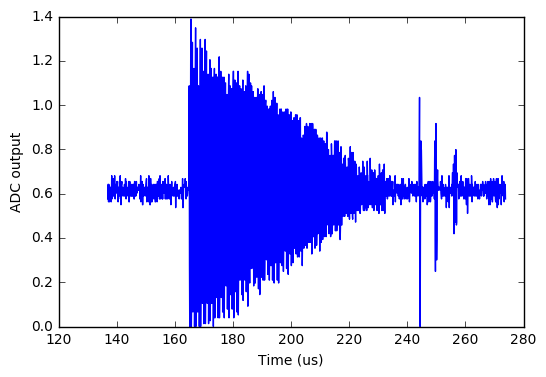

In [18]:
RefT = 1500
plt.plot(t[RefT+0:RefT+1500],Res[RefT+0:RefT+1500])  # plotting 50x 100ns, that's 5µs
plt.ylabel('ADC output')
plt.xlabel("Time (us)")
plt.show()

## Checking the frequency

As the emulator is a bit below 2MHz, we should see something accordingly

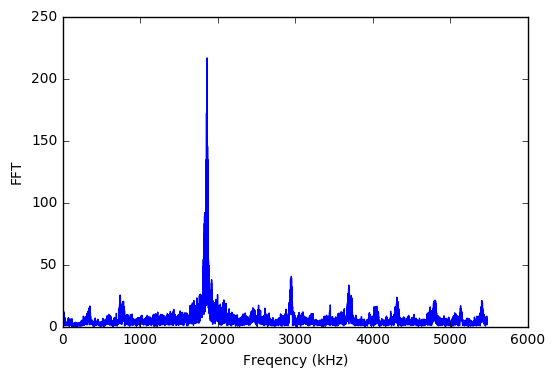

In [11]:
FFT = np.fft.fft(Res)
FFT[0]=0
Freqs = [1000.0 * x /N for x in range(5000)]
plt.plot(Freqs,abs(FFT[0:5000]))  # plotting 50x 100ns, that's 5µs
plt.ylabel('FFT')
plt.xlabel("Freqency (kHz)")
plt.show()

# Testing with a crappy (real piezo) situation

Real piezo, put in a glass of water

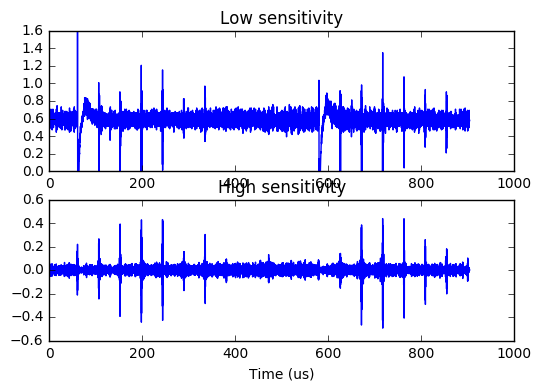

In [65]:
Res, t, N = CreateSeries("10MHz/10MHz_tasse_smartmaterials.csv",1000.0)
RefT = 50*10

# FFT
FFT = np.fft.fft(Res)
FFT[0]=0
Freqs = [1000.0 * x /N for x in range(5000)]
Sorted = range(10000)
for k in range(5000):
    if ((k < 2500) and (k > 1500)):
        Sorted[k] = FFT[k]
        Sorted[9999-k] = FFT[9999-k]
    else:
        Sorted[k] = 0
        Sorted[9999-k] = 0
# We rebuild the signal
Rebuilt = np.fft.ifft(Sorted)

# Plotting
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t,Res)
ax1.set_title('Low sensitivity')
plt.xlabel("Time (us)")
ax2.plot(t, Rebuilt)
ax2.set_title('High sensitivity')
plt.xlabel("Time (us)")
plt.show()

#### Details for echoes =)

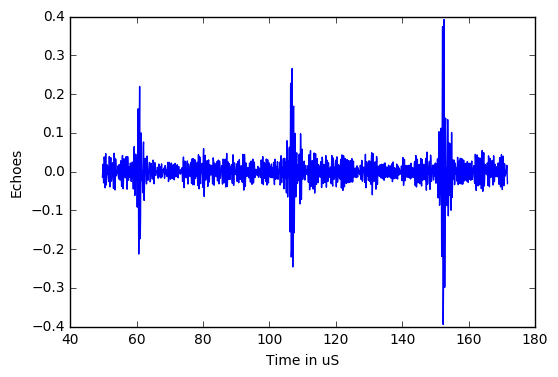

In [67]:
plt.plot(t[550:1900],Rebuilt[550:1900])  # plotting 50x 100ns, that's 5µs
plt.ylabel('Echoes')
plt.xlabel("Time in uS")
plt.show()